In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer

# Set random seed for reproducibility
np.random.seed(42)

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")
print("📊 Ready to build the Water Quality Predictor!")

✅ All libraries imported successfully!
📊 Ready to build the Water Quality Predictor!


In [2]:
#Manual file upload, too big switched to kaggle loading
from google.colab import files
uploaded = files.upload()

Saving water_potability.csv to water_potability.csv


In [3]:
df = pd.read_csv('water_potability.csv')
# Display basic information
print("\n📋 Dataset Info:")
display(df.info())

print("\n📊 First 5 rows:")
display(df.head())

print("\n📈 Statistical Summary:")
display(df.describe())

print("\n🎯 Target Variable Distribution:")
display(df['Potability'].value_counts())
print(f"Potable water percentage: {(df['Potability'].mean() * 100):.1f}%")


📋 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


None


📊 First 5 rows:


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0



📈 Statistical Summary:


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000



🎯 Target Variable Distribution:


,count
Potability,
0,1998
1,1278


Potable water percentage: 39.0%


🔍 Missing Values Analysis:
                 Missing Count  Percentage
ph                         491       14.99
Sulfate                    781       23.84
Trihalomethanes            162        4.95


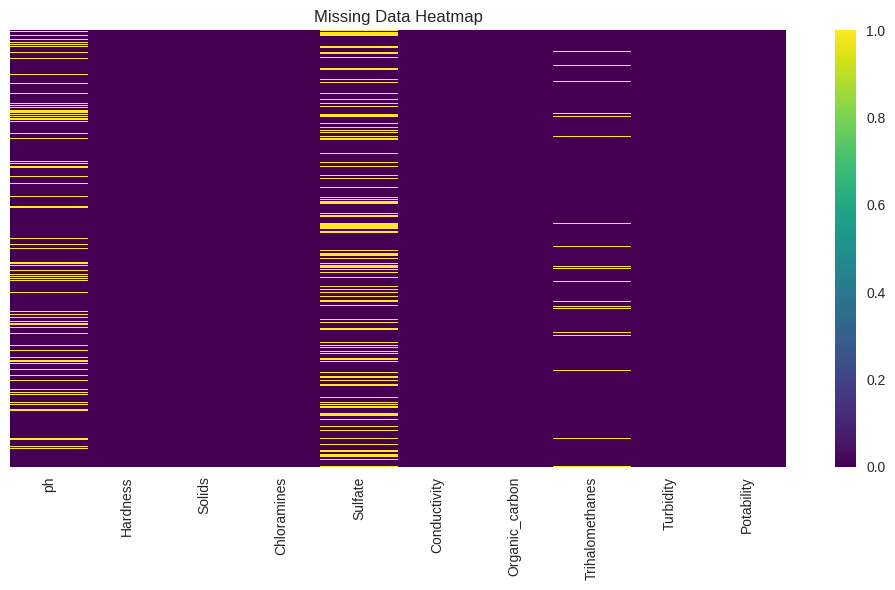


🔄 Duplicate rows: 0


In [ ]:
# Check for missing values
print("🔍 Missing Values Analysis:")
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100
missing_info = pd.DataFrame({
    'Missing Count': missing_data,
    'Percentage': missing_percentage
}).round(2)
print(missing_info[missing_info['Missing Count'] > 0])

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=True, cmap='viridis', yticklabels=False)
plt.title('Missing Data Heatmap')
plt.tight_layout()
plt.show()

# Check for duplicates
print(f"\n🔄 Duplicate rows: {df.duplicated().sum()}")

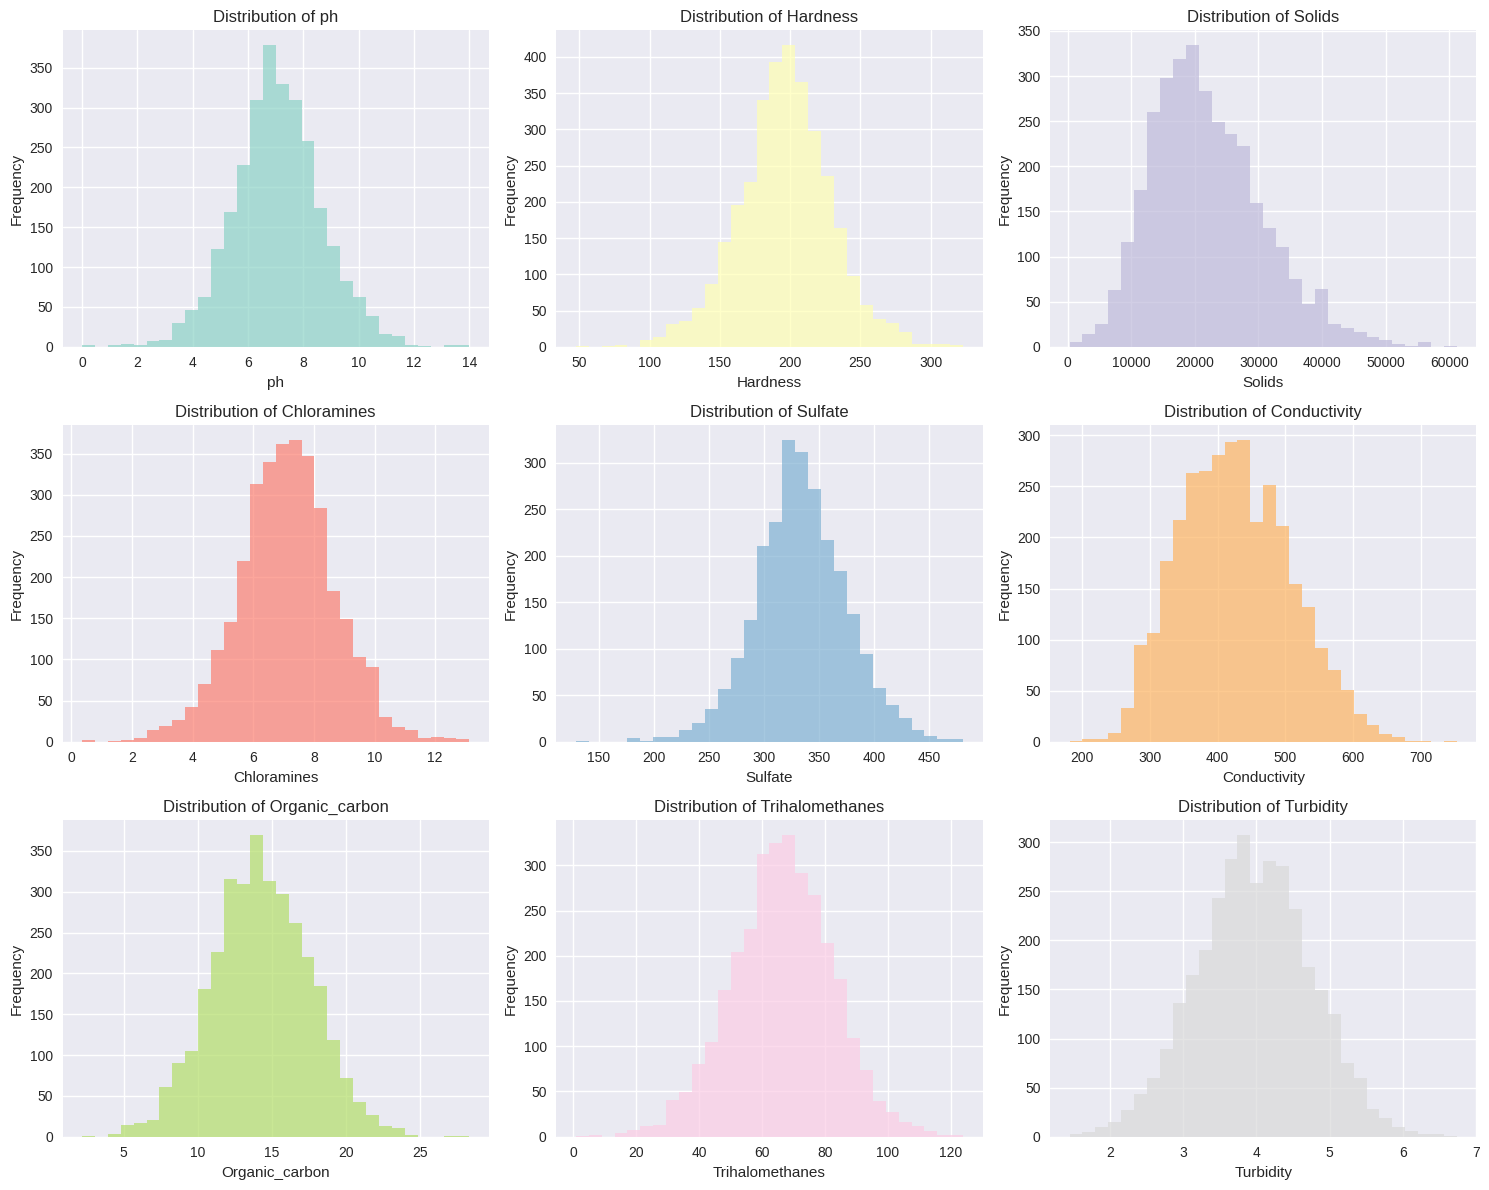

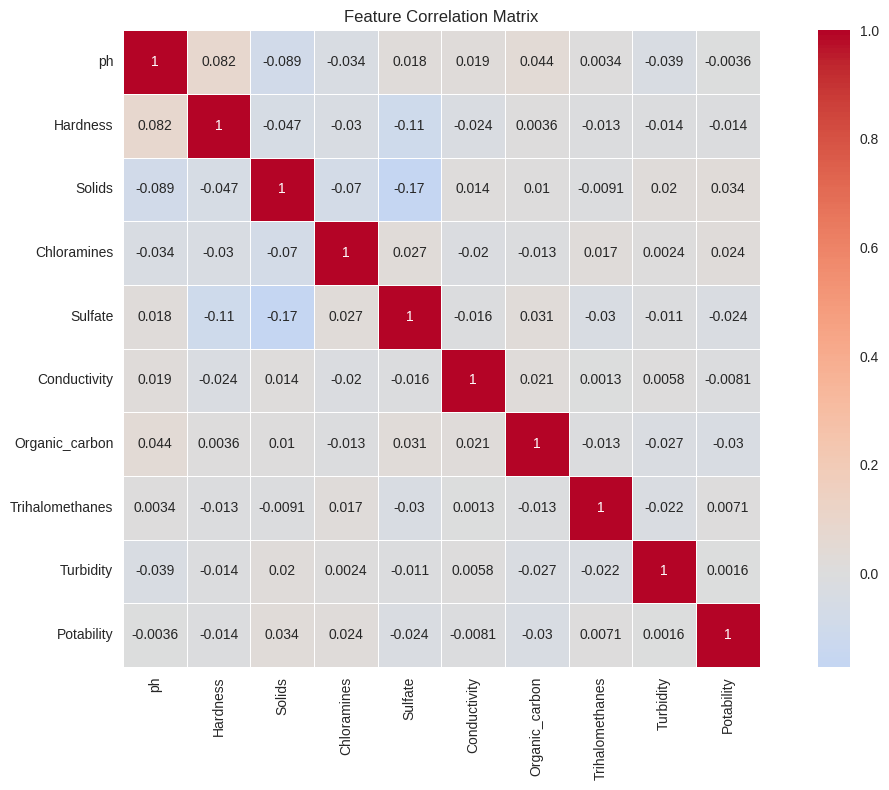

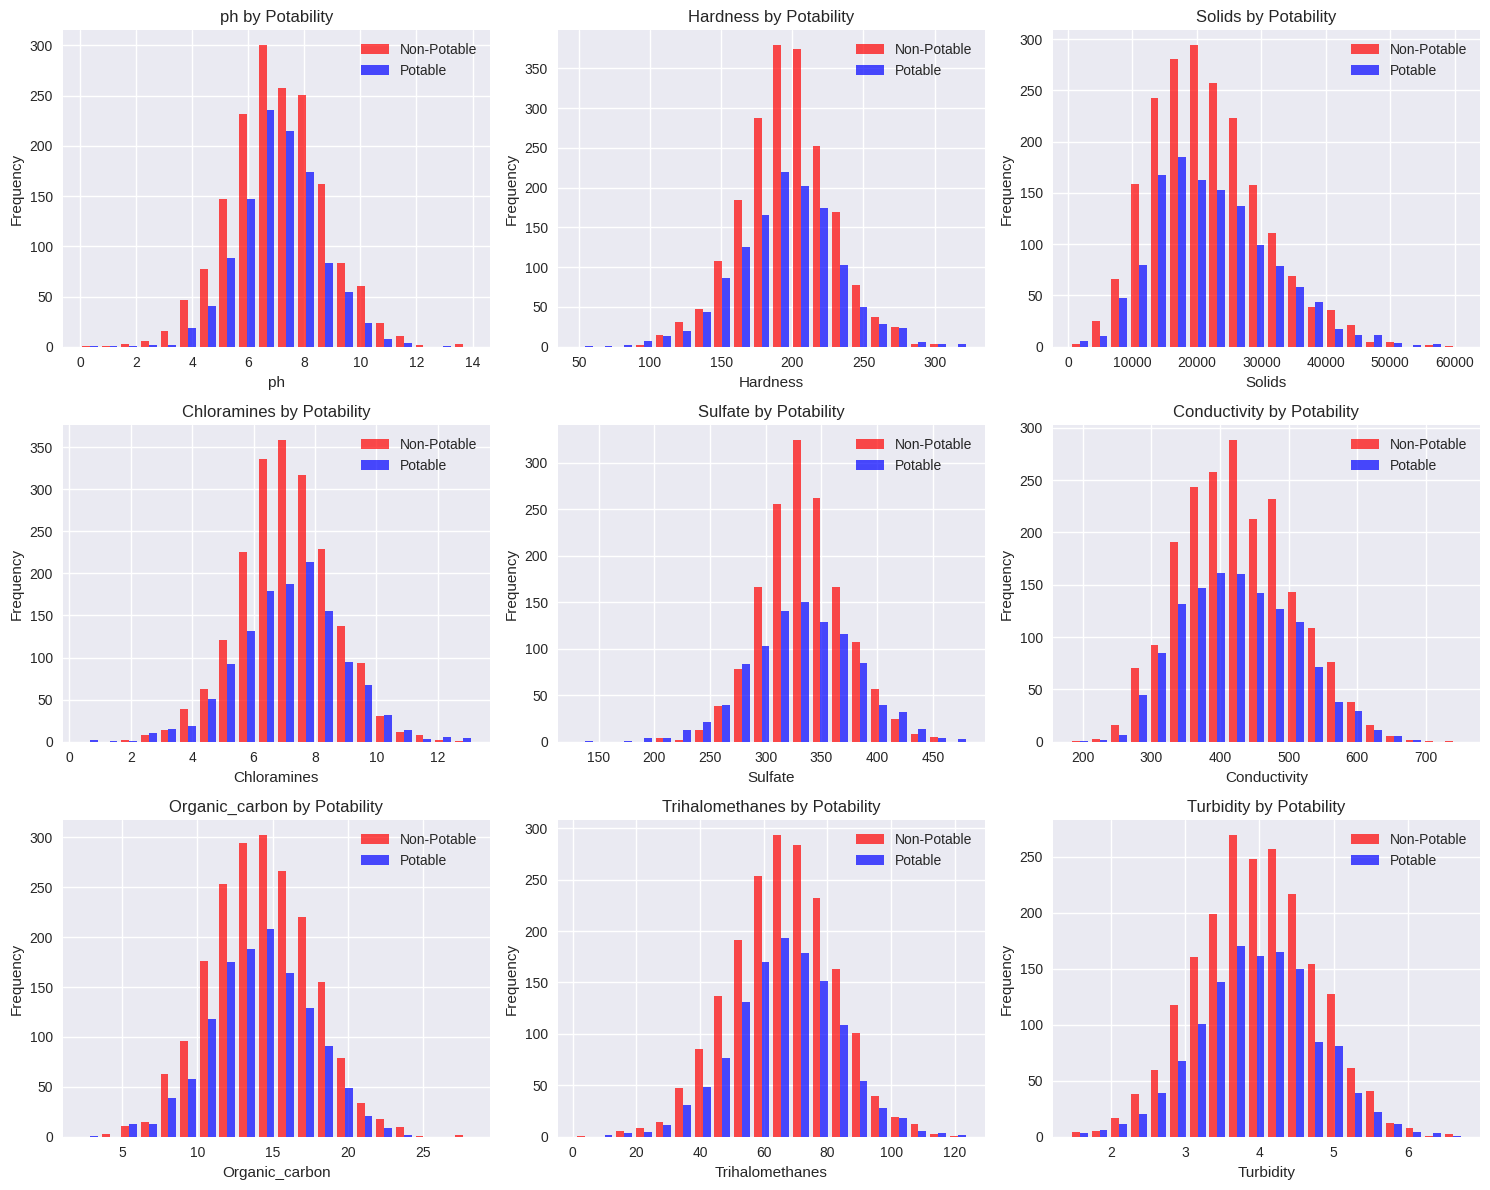

In [4]:
# Feature distribution plots
features = df.columns[:-1]  # All columns except 'Potability'
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for i, feature in enumerate(features):
    axes[i].hist(df[feature].dropna(), bins=30, alpha=0.7, color=plt.cm.Set3(i))
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Potability analysis by features
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for i, feature in enumerate(features):
    df_clean = df[[feature, 'Potability']].dropna()

    potable = df_clean[df_clean['Potability'] == 1][feature]
    non_potable = df_clean[df_clean['Potability'] == 0][feature]

    axes[i].hist([non_potable, potable], bins=20, alpha=0.7,
                label=['Non-Potable', 'Potable'], color=['red', 'blue'])
    axes[i].set_title(f'{feature} by Potability')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

plt.tight_layout()
plt.show()

In [5]:
# Separate features and target
X = df.drop('Potability', axis=1)
y = df['Potability']

print("🔧 Data Preprocessing:")
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Handle missing values using median imputation
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

print(f"\n✅ Missing values after imputation: {X_imputed.isnull().sum().sum()}")

# Feature scaling
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X_imputed.columns)

print("📊 Scaled features summary:")
print(X_scaled.describe().round(3))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n📂 Data Split:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Training set potability rate: {y_train.mean():.3f}")
print(f"Test set potability rate: {y_test.mean():.3f}")

🔧 Data Preprocessing:
Features shape: (3276, 9)
Target shape: (3276,)

✅ Missing values after imputation: 0
📊 Scaled features summary:
             ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
count  3276.000  3276.000  3276.000     3276.000  3276.000      3276.000   
mean      0.000     0.000    -0.000        0.000    -0.000         0.000   
std       1.000     1.000     1.000        1.000     1.000         1.000   
min      -4.813    -4.530    -2.474       -4.277    -5.662        -3.028   
25%      -0.542    -0.594    -0.724       -0.629    -0.457        -0.748   
50%      -0.025     0.018    -0.124        0.005    -0.015        -0.053   
75%       0.541     0.617     0.607        0.627     0.464         0.688   
max       4.712     3.856     4.473        3.794     4.079         4.048   

       Organic_carbon  Trihalomethanes  Turbidity  
count        3276.000         3276.000   3276.000  
mean            0.000           -0.000      0.000  
std             1.000   

In [6]:
# Define models to compare
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'SVM': SVC(random_state=42, probability=True)
}

# Train and evaluate models
model_results = {}

print("🤖 Training Multiple Models:")
print("=" * 50)

for name, model in models.items():
    print(f"\n🔄 Training {name}...")

    # Train model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred_proba)

    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

    model_results[name] = {
        'model': model,
        'accuracy': accuracy,
        'auc': auc_score,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }

    print(f"✅ {name} Results:")
    print(f"   Accuracy: {accuracy:.4f}")
    print(f"   AUC Score: {auc_score:.4f}")
    print(f"   CV Mean: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Select best model
best_model_name = max(model_results.keys(), key=lambda k: model_results[k]['accuracy'])
best_model = model_results[best_model_name]['model']

print(f"\n🏆 Best Model: {best_model_name}")
print(f"Best Accuracy: {model_results[best_model_name]['accuracy']:.4f}")

🤖 Training Multiple Models:

🔄 Training Logistic Regression...
✅ Logistic Regression Results:
   Accuracy: 0.6098
   AUC Score: 0.5485
   CV Mean: 0.6099 (+/- 0.0031)

🔄 Training Random Forest...
✅ Random Forest Results:
   Accuracy: 0.6585
   AUC Score: 0.6407
   CV Mean: 0.6668 (+/- 0.0355)

🔄 Training SVM...
✅ SVM Results:
   Accuracy: 0.6707
   AUC Score: 0.6487
   CV Mean: 0.6824 (+/- 0.0247)

🏆 Best Model: SVM
Best Accuracy: 0.6707


📊 Detailed Evaluation - SVM

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.93      0.77       400
           1       0.70      0.27      0.39       256

    accuracy                           0.67       656
   macro avg       0.68      0.60      0.58       656
weighted avg       0.68      0.67      0.62       656



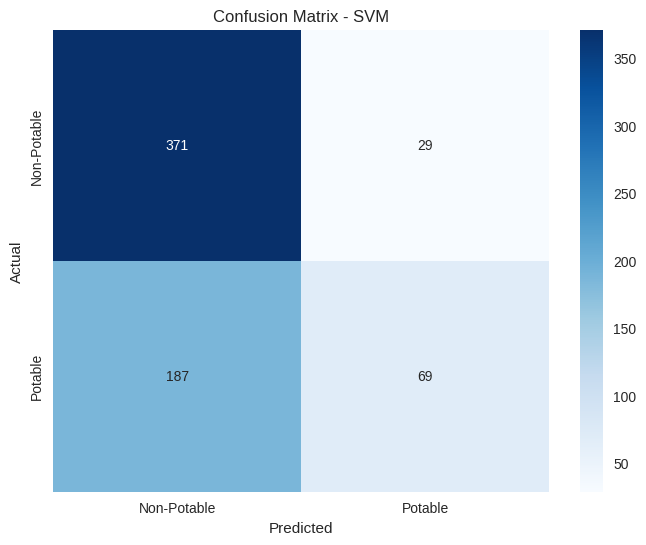

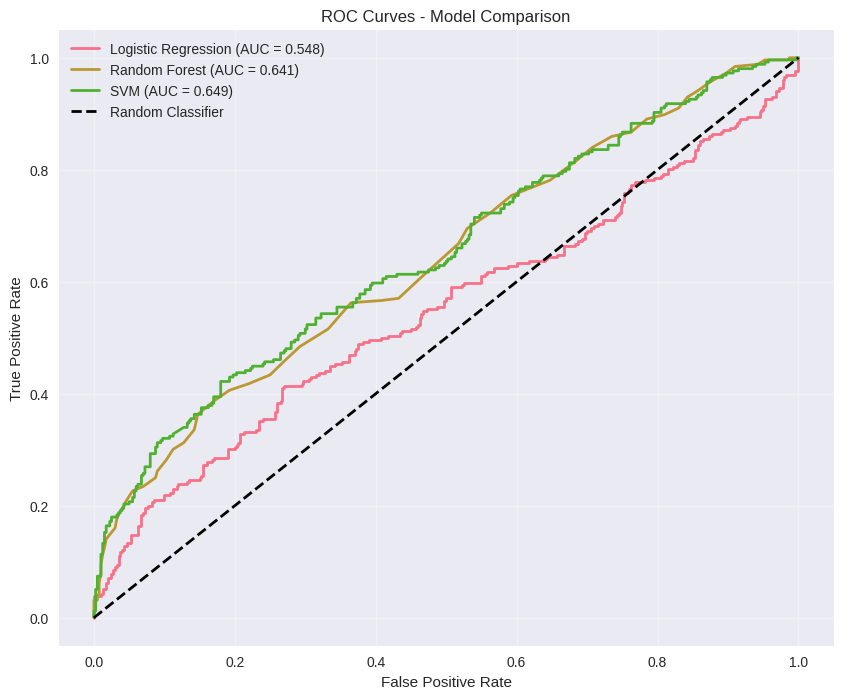

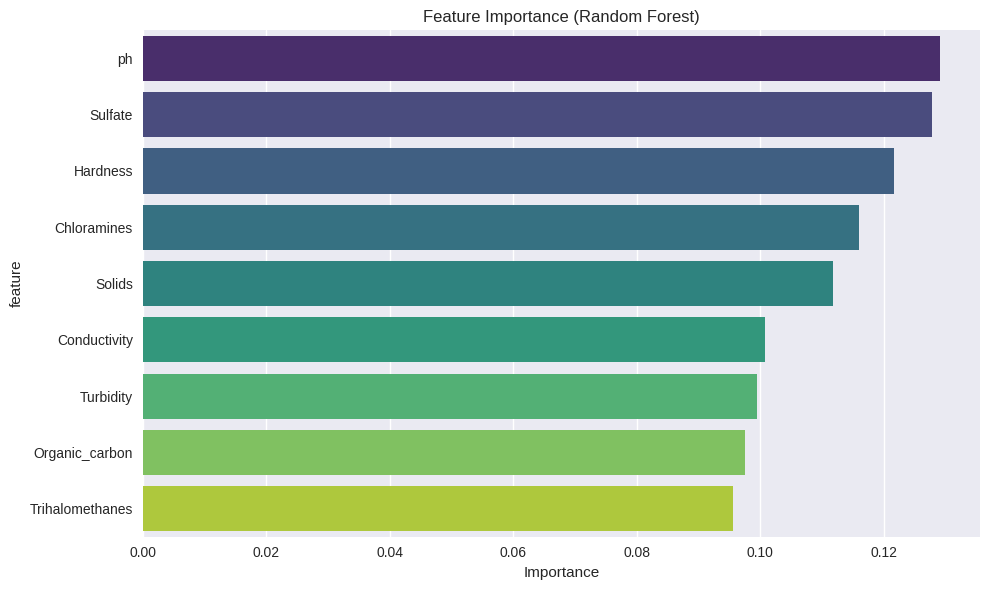

🎯 Top 5 Most Important Features:
       feature  importance
0           ph    0.129132
4      Sulfate    0.127858
1     Hardness    0.121633
3  Chloramines    0.116048
2       Solids    0.111863


In [11]:
# Detailed evaluation of the best model
print(f"📊 Detailed Evaluation - {best_model_name}")
print("=" * 50)

best_predictions = model_results[best_model_name]['predictions']
best_probabilities = model_results[best_model_name]['probabilities']

# Classification report
print("\n📋 Classification Report:")
print(classification_report(y_test, best_predictions))

# Confusion matrix
cm = confusion_matrix(y_test, best_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Potable', 'Potable'],
            yticklabels=['Non-Potable', 'Potable'])
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC Curves for all models
plt.figure(figsize=(10, 8))
for name, results in model_results.items():
    fpr, tpr, _ = roc_curve(y_test, results['probabilities'])
    plt.plot(fpr, tpr, linewidth=2, label=f"{name} (AUC = {results['auc']:.3f})")

plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Model Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Feature importance
if 'Random Forest' in model_results:
    rf_model = model_results['Random Forest']['model']
    feature_importance = pd.DataFrame({
        'feature': X_train.columns,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')
    plt.title('Feature Importance (Random Forest)')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()

    print("🎯 Top 5 Most Important Features:")
    print(feature_importance.head())

In [8]:
# Hyperparameter tuning for the best model
print(f"🔧 Optimizing {best_model_name}...")

if best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
    base_model = RandomForestClassifier(random_state=42)

elif best_model_name == 'Logistic Regression':
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'lbfgs']
    }
    base_model = LogisticRegression(random_state=42, max_iter=1000)

else:  # SVM
    param_grid = {
        'C': [0.1, 1, 10],
        'kernel': ['rbf', 'linear'],
        'gamma': ['scale', 'auto']
    }
    base_model = SVC(random_state=42, probability=True)

# Grid search
grid_search = GridSearchCV(base_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Evaluate optimized model
optimized_model = grid_search.best_estimator_
optimized_pred = optimized_model.predict(X_test)
optimized_accuracy = accuracy_score(y_test, optimized_pred)

print(f"✅ Optimization Results:")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Original accuracy: {model_results[best_model_name]['accuracy']:.4f}")
print(f"Optimized accuracy: {optimized_accuracy:.4f}")
print(f"Improvement: {optimized_accuracy - model_results[best_model_name]['accuracy']:.4f}")

# Use optimized model if better
if optimized_accuracy > model_results[best_model_name]['accuracy']:
    best_model = optimized_model
    print("🔄 Using optimized model for deployment")
else:
    print("🔄 Using original model for deployment")

🔧 Optimizing SVM...
✅ Optimization Results:
Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Original accuracy: 0.6707
Optimized accuracy: 0.6707
Improvement: 0.0000
🔄 Using original model for deployment


In [9]:
import joblib
import os

# Create models directory
os.makedirs('models', exist_ok=True)

# Save the best model and preprocessing objects
joblib.dump(best_model, 'models/best_water_quality_model.pkl')
joblib.dump(scaler, 'models/feature_scaler.pkl')
joblib.dump(imputer, 'models/feature_imputer.pkl')

# Save feature names for the app
feature_names = X.columns.tolist()
joblib.dump(feature_names, 'models/feature_names.pkl')

print("💾 Model and preprocessing objects saved successfully!")
print("📁 Files saved:")
print("   - models/best_water_quality_model.pkl")
print("   - models/feature_scaler.pkl")
print("   - models/feature_imputer.pkl")
print("   - models/feature_names.pkl")

# Test loading
try:
    loaded_model = joblib.load('models/best_water_quality_model.pkl')
    loaded_scaler = joblib.load('models/feature_scaler.pkl')
    loaded_imputer = joblib.load('models/feature_imputer.pkl')
    loaded_features = joblib.load('models/feature_names.pkl')
    print("✅ Model loading test successful!")
except Exception as e:
    print(f"❌ Error loading model: {e}")

💾 Model and preprocessing objects saved successfully!
📁 Files saved:
   - models/best_water_quality_model.pkl
   - models/feature_scaler.pkl
   - models/feature_imputer.pkl
   - models/feature_names.pkl
✅ Model loading test successful!


In [10]:
def predict_water_quality(ph, hardness, solids, chloramines, sulfate,
                         conductivity, organic_carbon, trihalomethanes, turbidity):
    """
    Predict water quality based on input parameters

    Returns:
        tuple: (prediction, probability, confidence_level)
    """
    try:
        # Load model and preprocessing objects
        model = joblib.load('models/best_water_quality_model.pkl')
        scaler = joblib.load('models/feature_scaler.pkl')
        imputer = joblib.load('models/feature_imputer.pkl')

        # Create input array
        input_data = np.array([[ph, hardness, solids, chloramines, sulfate,
                              conductivity, organic_carbon, trihalomethanes, turbidity]])

        # Apply preprocessing
        input_imputed = imputer.transform(input_data)
        input_scaled = scaler.transform(input_imputed)

        # Make prediction
        prediction = model.predict(input_scaled)[0]
        probability = model.predict_proba(input_scaled)[0]

        # Calculate confidence level
        confidence = max(probability)

        if confidence >= 0.8:
            confidence_level = "High"
        elif confidence >= 0.6:
            confidence_level = "Medium"
        else:
            confidence_level = "Low"

        return prediction, probability, confidence_level

    except Exception as e:
        print(f"Error in prediction: {e}")
        return None, None, None

# Test the prediction function
print("🧪 Testing Prediction Function:")
test_prediction, test_probability, test_confidence = predict_water_quality(
    ph=7.0, hardness=200, solids=20000, chloramines=8.0, sulfate=300,
    conductivity=400, organic_carbon=15, trihalomethanes=80, turbidity=4.0
)

if test_prediction is not None:
    result = "Potable" if test_prediction == 1 else "Not Potable"
    print(f"✅ Test Result: {result}")
    print(f"   Probability: {test_probability}")
    print(f"   Confidence: {test_confidence}")
else:
    print("❌ Prediction function test failed")

🧪 Testing Prediction Function:
✅ Test Result: Not Potable
   Probability: [0.61862064 0.38137936]
   Confidence: Medium


In [12]:
joblib.dump(model, 'water_quality_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [13]:
model = joblib.load('water_quality_model.pkl')
scaler = joblib.load('scaler.pkl')

In [14]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Create models directory
models_dir = '/content/drive/My Drive/water_quality_models'
os.makedirs(models_dir, exist_ok=True)

# Save all model components
joblib.dump(model, f'{models_dir}/best_water_quality_model.pkl')
joblib.dump(scaler, f'{models_dir}/feature_scaler.pkl')
joblib.dump(imputer, f'{models_dir}/feature_imputer.pkl')
joblib.dump(list(X.columns), f'{models_dir}/feature_names.pkl')

print("Models saved successfully!")

Mounted at /content/drive
Models saved successfully!


In [15]:
pip freeze > requirements.txt

In [16]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 3.7 MB/s eta 0:00:00


In [ ]:
!pip install streamlit pyngrok numpy joblib